# MNIST 손글씨 분류 - 신경망

In [ ]:
import numpy as np
import pandas as pd
import tensorflow as tf
seed = 2022
np.random.seed(seed)
tf.random.set_seed(seed)
import matplotlib.pyplot as plt

## 데이터 전처리

In [ ]:
from tensorflow.keras.datasets import mnist
(X_train, y_train), (X_test, y_test) = mnist.load_data()
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((60000, 28, 28), (10000, 28, 28), (60000,), (10000,))

##### def 숨기기

In [ ]:
def xx():
    return [(1,2), (3,4)]

In [ ]:
a,b=xx()
a,b

((1, 2), (3, 4))

In [ ]:
(a,b),(c,d) = xx()
a,b,c,d

(1, 2, 3, 4)

## def 숨김완료

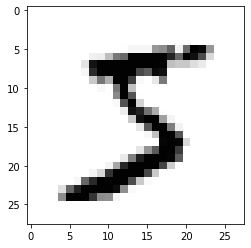

In [ ]:
import matplotlib.pyplot as plt
plt.imshow(X_train[0], cmap='Greys')
plt.show()

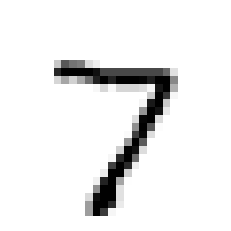

In [ ]:
plt.imshow(X_test[0], cmap='Greys'); plt.axis('off')
plt.imshow(X_test[0], cmap='Greys'); plt.axis('off');   # plt.show() 대신 세미콜론으로도 역할 가능

In [ ]:
# MNIST 에서는 0이 흰색 숫자 큰놈 255이 검은놈 / 나중에 이미지 배울땐 반대로 0이 검은색, 255가 흰색
import sys
for row in X_train[0]:
    for x in row:
        sys.stdout.write(f'{x:3d}')
    sys.stdout.write('\n')

  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  3 18 18 18126136175 26166255247127  0  0  0  0
  0  0  0  0  0  0  0  0 30 36 94154170253253253253253225172253242195 64  0  0  0  0
  0  0  0  0  0  0  0 49238253253253253253253253253251 93 82 82 56 39  0  0  0  0  0
  0  0  0  0  0  0  0 18219253253253253253198182247241  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0 80156107253253205 11  0 43154  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0 14  1154253 90  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0139253190  2  0  0  0  0  0  0  

원래 아날로그데이터를 -> 디지털로 바꾸려면 샘플링을 해야해.  
      가장어두운 값을 255로 가장 밝은 값을 0으로 만든 값. 왜 256단계 인가? 

그럼 오디오는 어때? 
사람의 가청주파수는 20 ~ 18000 Hz범위나 나이가 먹으면서 떨어지고   
가장 잘들리는 (진폭이 크다 한다) 3000Hz 대로서  
전화기에서는 4000 Hz 까지 통과시켜보자, 샘플링 해보자 한다

초당 8000번을 7bit로 56kbps로 전달 한다고. 대역폭. 주파수

그렇다면 TV는 어떨까? HDT 하이 데피니션 TV 1920 1080 FHD경우
그리고 주사율 60Hz

2.9 * 10^10 이렇게 되면 2GBPS 된다.


아날로그 데이터를 디저털로 변환하기 위해서는 샘플링이 필요하다. 이것을 양자화 , 및 샘플링이라 한다. 

In [ ]:
# 다시 
type(X_train), X_train.dtype   # unit8 : unsigned int (8bit) : 0 - 255

(numpy.ndarray, dtype('uint8'))

In [ ]:
# 정규화 하는 방법 조금 편하게 쓸 수 있어 .
# 0 - 1 사이의 값으로 정규화
X_train = X_train/255.0
X_test = X_test/255.

In [ ]:
# 차원을 축소,, 변경? : 이미지 2차원(28*28)을 1차원 으로 변경
# 그러나 X 

X_train = X_train.reshape(60000, -1)
X_test = X_test.reshape(-1, 784)                 # 784는 28^2
X_train.shape, X_test.shape

((60000, 784), (10000, 784))

In [ ]:
# X_test 리쉐입 전후 살펴볼것.

In [ ]:
y_test

array([7, 2, 1, ..., 4, 5, 6], dtype=uint8)

In [ ]:
# One hot encoding # 다중분류 # 기존의 y test 1차원 어레이 원핫 인코딩 (to 카테고리컬)으로 2차원 배열 되. 
from tensorflow.keras.utils import to_categorical
Y_train = to_categorical(y_train)
Y_test = to_categorical(y_test)
Y_train.shape, Y_test.shape

((60000, 10), (10000, 10))

## 모델 정의/설정/실행/평가

In [ ]:
from tensorflow.keras.models import Sequential, load_model  ##
from tensorflow.keras.layers import Dense
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping

In [ ]:
model = Sequential([
    Dense(512, input_dim=784, activation='relu'),
    Dense(48, activation='relu'),
    Dense(10, activation='softmax'),    
])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 512)               401920    
                                                                 
 dense_1 (Dense)             (None, 48)                24624     
                                                                 
 dense_2 (Dense)             (None, 10)                490       
                                                                 
Total params: 427,034
Trainable params: 427,034
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# 환경설정 모델 컴파일 
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
# 모델 패스
model_path = 'mnist_dnn.h5'
checkpoint = ModelCheckpoint(model_path, save_best_only=True, verbose=1)
early_stop = EarlyStopping(patience=10)

In [ ]:
# 왜 이렇게 써요. read the menual
hist = model.fit(X_train, Y_train,     validation_split=0.2, 
                epochs=100, batch_size=200, verbose=0,
                 callbacks=[checkpoint, early_stop])  # R T Menu


Epoch 00001: val_loss improved from inf to 0.15756, saving model to mnist_dnn.h5

Epoch 00002: val_loss improved from 0.15756 to 0.11145, saving model to mnist_dnn.h5

Epoch 00003: val_loss improved from 0.11145 to 0.09489, saving model to mnist_dnn.h5

Epoch 00004: val_loss improved from 0.09489 to 0.08462, saving model to mnist_dnn.h5

Epoch 00005: val_loss did not improve from 0.08462

Epoch 00006: val_loss improved from 0.08462 to 0.08093, saving model to mnist_dnn.h5

Epoch 00007: val_loss improved from 0.08093 to 0.07590, saving model to mnist_dnn.h5

Epoch 00008: val_loss did not improve from 0.07590

Epoch 00009: val_loss did not improve from 0.07590

Epoch 00010: val_loss did not improve from 0.07590

Epoch 00011: val_loss did not improve from 0.07590

Epoch 00012: val_loss did not improve from 0.07590

Epoch 00013: val_loss did not improve from 0.07590

Epoch 00014: val_loss did not improve from 0.07590

Epoch 00015: val_loss did not improve from 0.07590

Epoch 00016: val_lo

In [ ]:
best_model = load_model(model_path)
best_model.evaluate(X_test, Y_test)

313/313 [==============================] - 1s 3ms/step - loss: 0.0647 - accuracy: 0.9810


[0.06470876187086105, 0.9810000061988831]

- 학습과정 시각화

In [ ]:
y_acc = hist.history['accuracy']
y_vloss = hist.history['val_loss']
xs = np.arange(1, len(y_acc)+1)

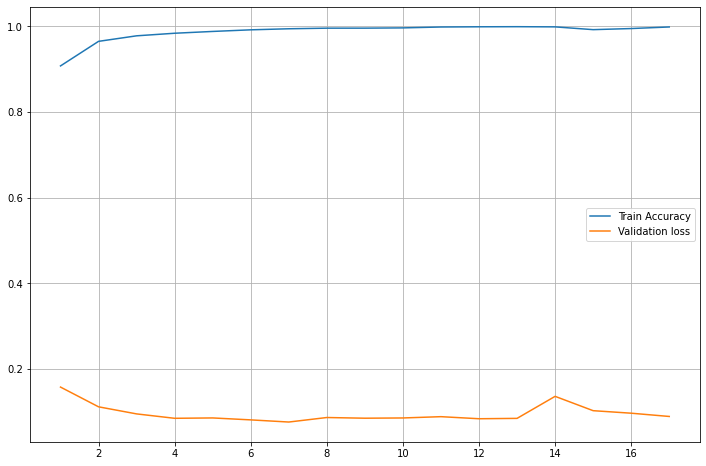

In [ ]:
plt.figure(figsize=(12,8))
plt.plot(xs, y_acc, markersize=3, label='Train Accuracy')
plt.plot(xs, y_vloss, markersize=3, label='Validation loss')
plt.legend()
plt.grid()
plt.show()